## Element Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("toydata.csv")
X_name = [f'element {i}' for i in range(1,13)]
Y_name = [f'property']

In [3]:
df.describe()

,element 1,element 2,element 3,element 4,element 5,element 6,element 7,element 8,element 9,element 10,element 11,element 12,property
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,0.646739,0.038234,0.010441,0.071555,0.010296,0.102396,0.000389,0.002212,0.000252,0.014361,0.001012,0.102114,0.559374
std,0.426578,0.079260,0.009357,0.187491,0.023224,0.253938,0.001307,0.002500,0.000413,0.062791,0.002162,0.279980,0.904545
min,0.002978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.130711
25%,0.043145,0.000000,0.006455,0.000000,0.003450,0.000000,0.000182,0.000283,0.000093,0.000000,0.000000,0.000000,-0.521363
50%,0.957447,0.004451,0.009432,0.003930,0.004543,0.002468,0.000248,0.001675,0.000247,0.000000,0.000000,0.000000,1.214581
75%,0.969603,0.014669,0.013620,0.012802,0.007754,0.005815,0.000347,0.002924,0.000344,0.000000,0.000000,0.000980,1.243887
max,0.977322,0.581123,0.135624,0.986388,0.190476,0.983735,0.015725,0.015563,0.006713,0.400385,0.011463,0.992851,1.262188


In [4]:
element_data = df.iloc[:,:12]
element_data.shape

(745, 12)

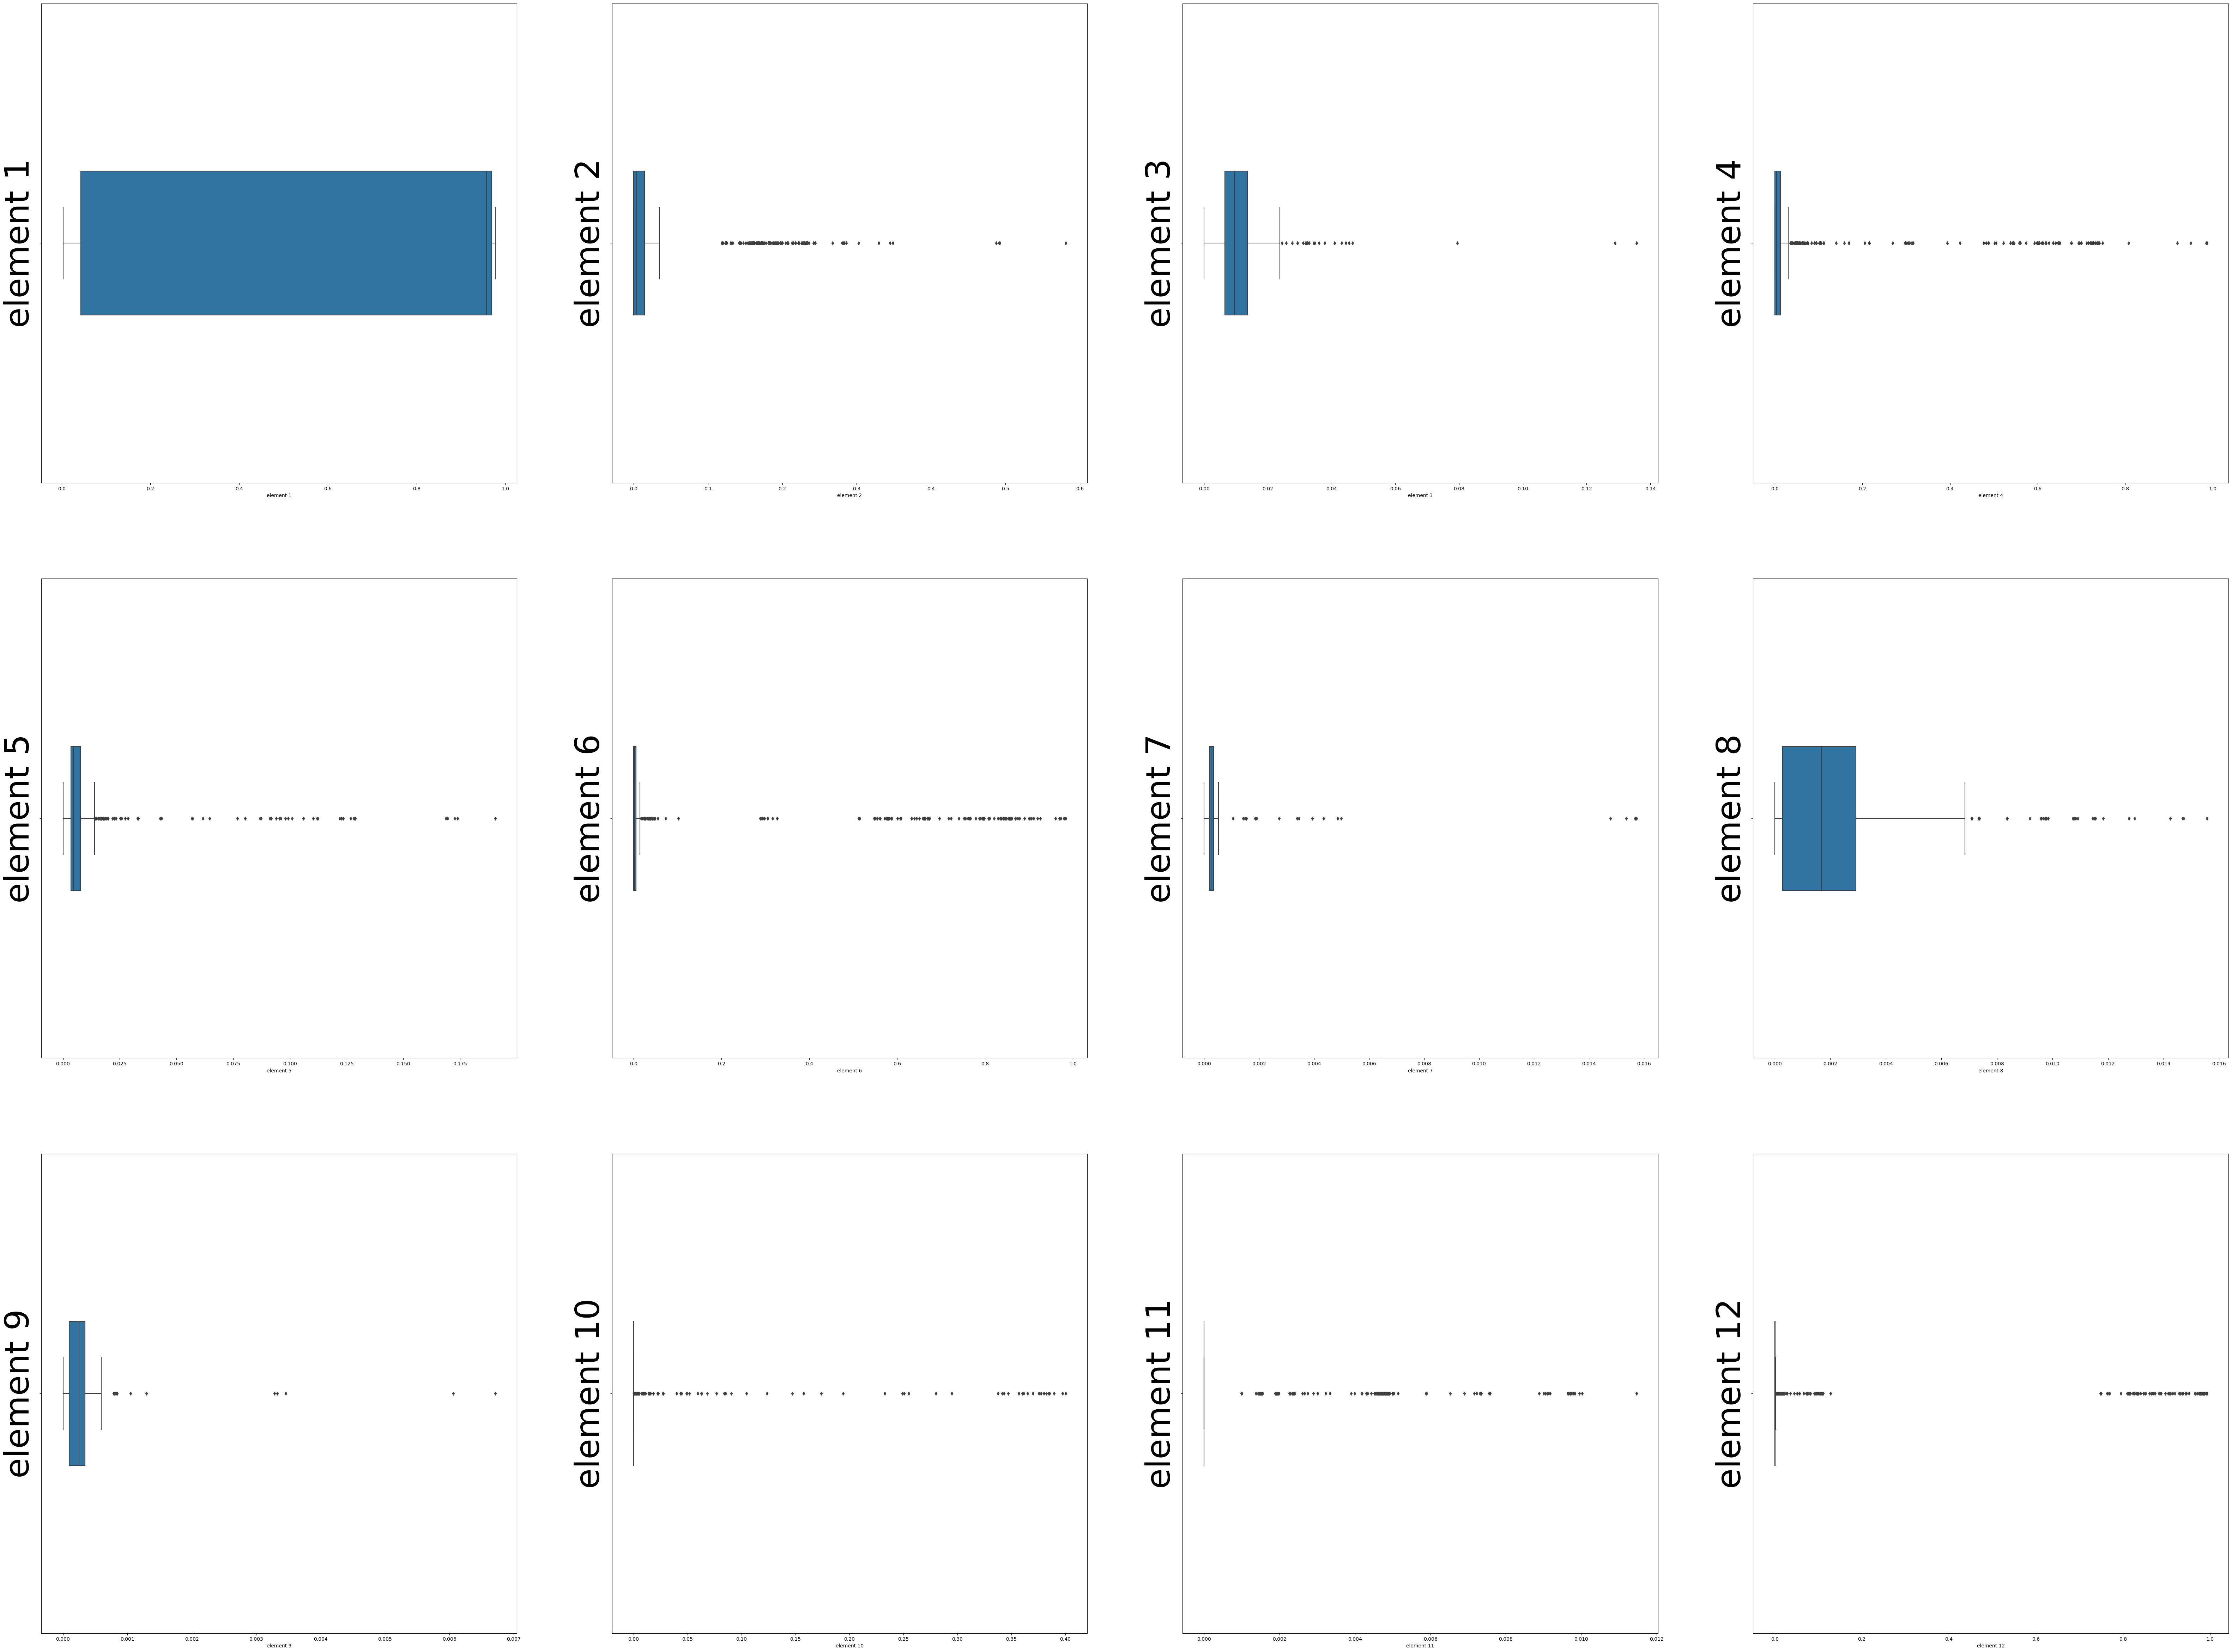

In [5]:
column = df.columns.tolist()[:12]
fig = plt.figure(figsize = (80, 60), dpi = 100)
for i in range(12):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df[column[i]], width=0.3)
    plt.ylabel(column[i],fontsize = 68)

plt.show()

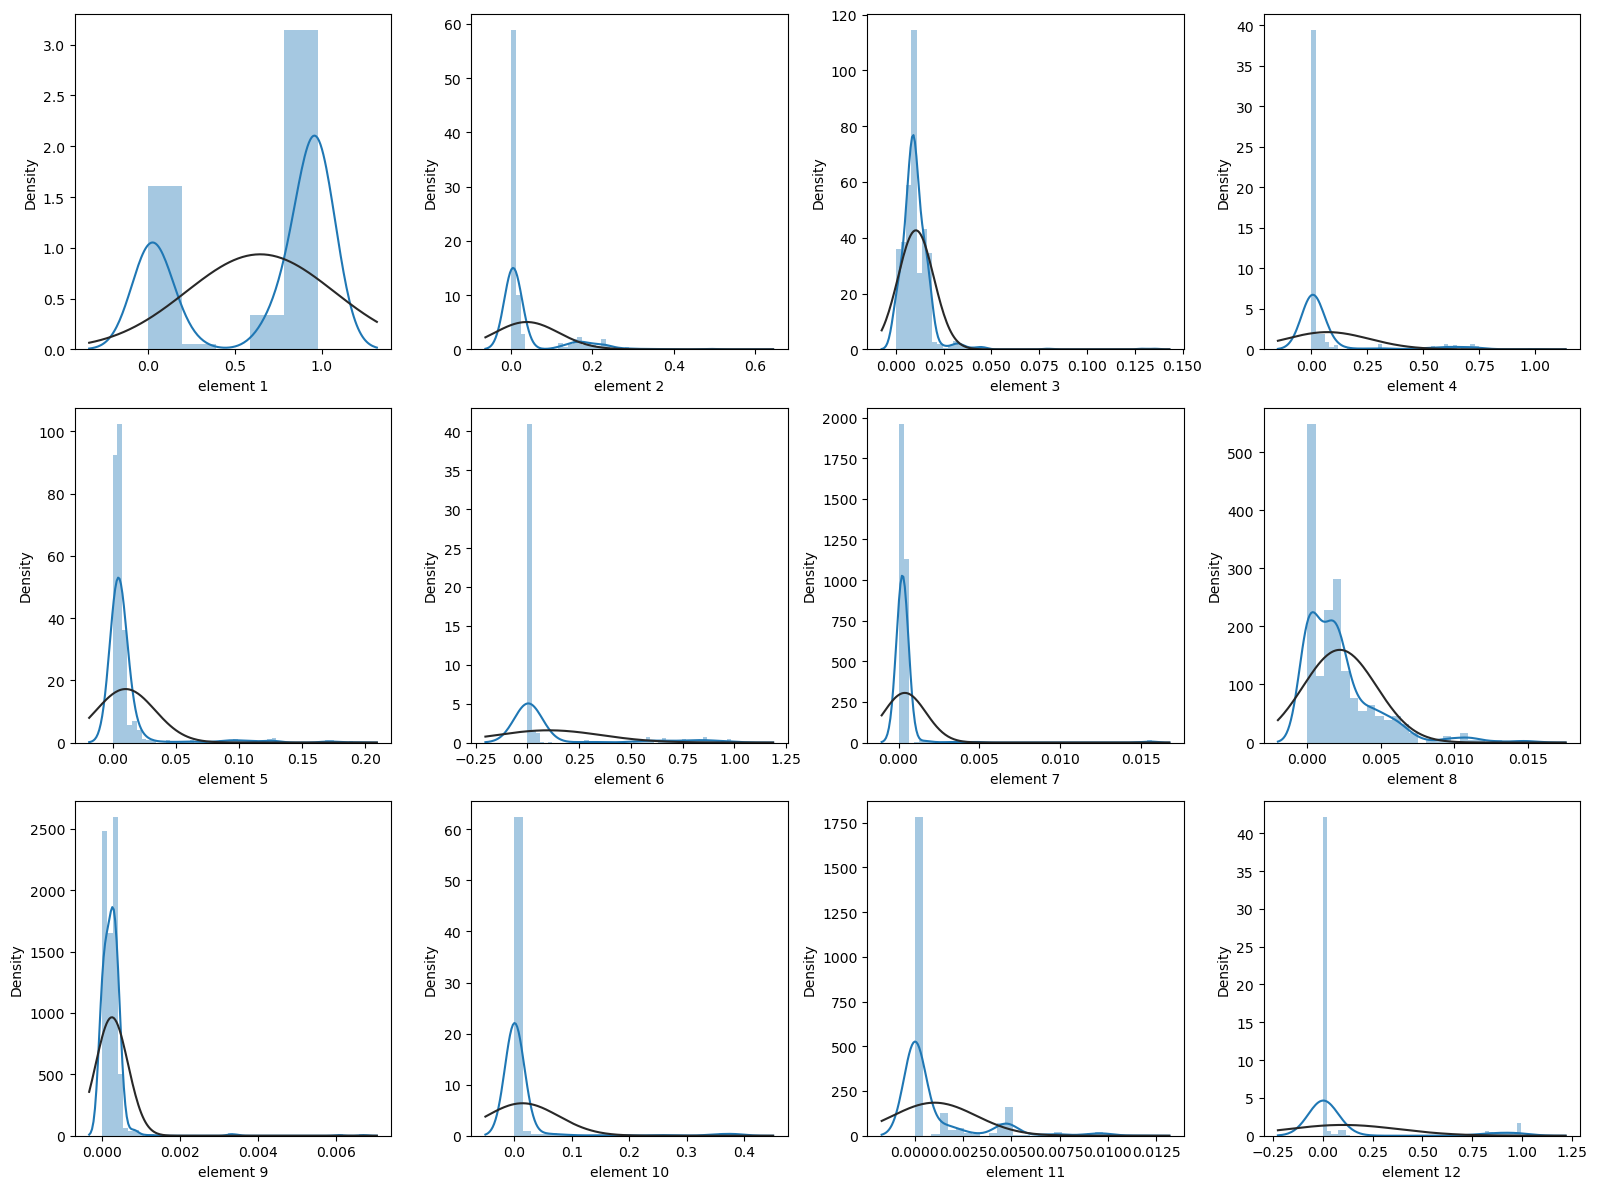

In [6]:
cols = 4
rows = len(element_data.columns) // cols
plt.figure(figsize=(4*cols, 4*rows))
i=0
for col in element_data.columns:
    i+=1
    ax = plt.subplot(rows, cols, i)
    sns.distplot(df[col], fit = stats.norm)
plt.tight_layout()
plt.show()

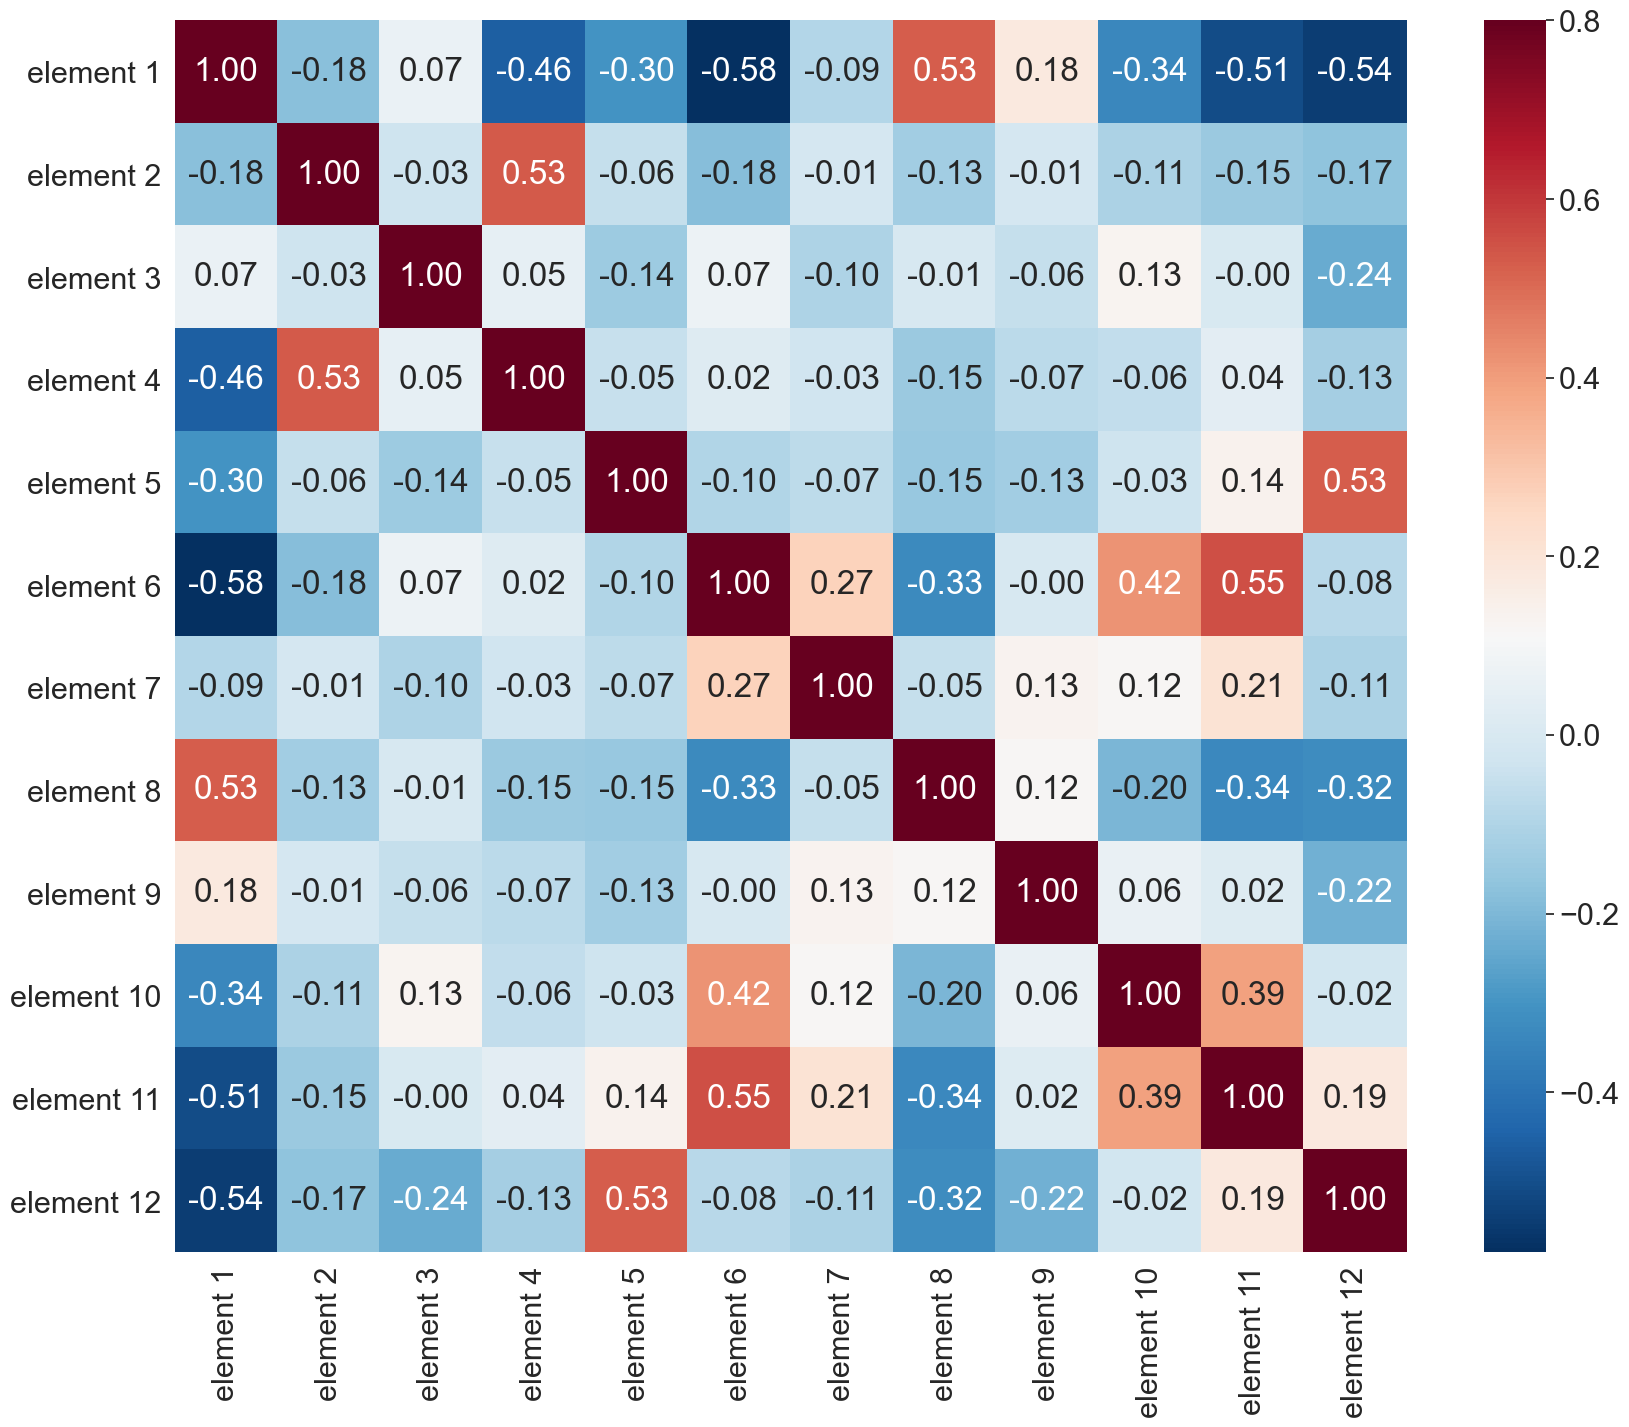

In [12]:
corr = df[X_name].corr()
ax = plt.subplots(figsize = (20, 16))
sns.set(font_scale=2.0)
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True,cmap="RdBu_r", fmt='.2f',annot_kws={'size':24})